<a href="https://colab.research.google.com/github/stephanienguyn/Capstone-Project/blob/main/Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import os
uploaded = files.upload()

Saving FB_stock_history.csv to FB_stock_history.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("FB_stock_history.csv")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...,...
2354,2021-09-27,349.809998,355.149994,347.079987,353.579987,15205800,0,0
2355,2021-09-28,347.970001,349.600006,338.920013,340.649994,21710300,0,0
2356,2021-09-29,343.149994,345.230011,338.880005,339.609985,14452200,0,0
2357,2021-09-30,340.450012,342.799988,338.149994,339.390015,16547100,0,0


In [ ]:
for x in df.loc[:, df.columns != 'Date']:
  df[x]=df[x].astype(float)
df['Date']=df['Date'].astype('datetime64[ns]')
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Dividends              float64
Stock Splits           float64
Year                   float64
Difference             float64
dtype: object

In [ ]:
df['Year']=df['Date'].str[0:4]
result = df.groupby('Year').sum()
result

<ipython-input-4-0edb302f1bc9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = df.groupby('Year').sum()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Year,,,,,,,
2012,3843.939997,3921.640001,3750.359993,3824.329990,8.470463e+09,0.0,0.0
2013,8940.060019,9083.349993,8802.400003,8941.249989,1.514318e+10,0.0,0.0
2014,17328.519947,17549.159977,17093.210056,17328.109955,1.197770e+10,0.0,0.0
2015,22364.850090,22600.209984,22116.219986,22370.760048,6.793638e+09,0.0,0.0
2016,29504.430008,29759.109947,29198.199936,29493.040009,6.419718e+09,0.0,0.0
2017,39276.749969,39546.939926,38992.100052,39300.620018,4.214278e+09,0.0,0.0
2018,43039.709984,43576.950104,42495.090057,43049.249878,6.942308e+09,0.0,0.0
2019,45754.769913,46237.599930,45271.520065,45772.649902,4.083980e+09,0.0,0.0
2020,59290.220047,60198.800171,58389.880127,59341.370071,5.678913e+09,0.0,0.0


Text(0, 0.5, 'Volume')

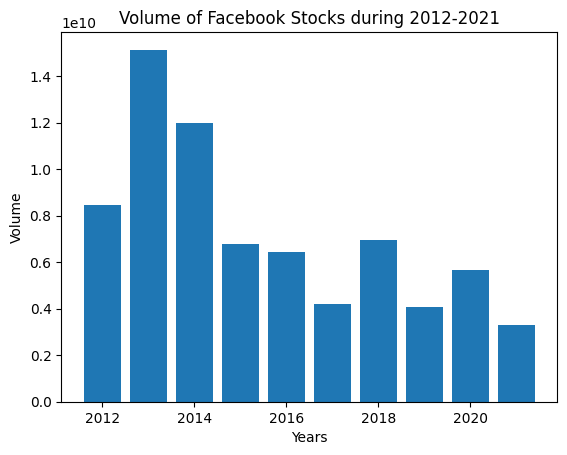

In [ ]:
years= range(2012,2022)
plt.bar(years,result['Volume'])
plt.title('Volume of Facebook Stocks during 2012-2021')
plt.xlabel('Years')
plt.ylabel('Volume')

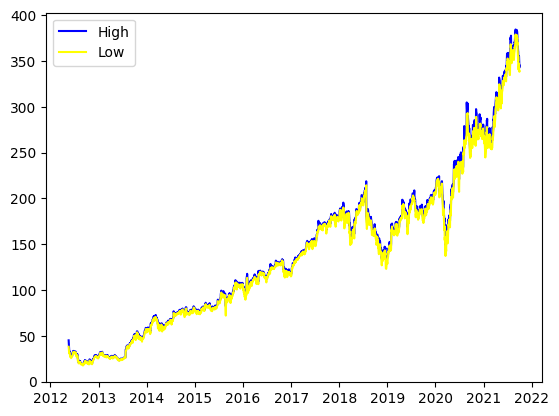

In [ ]:
import datetime
fig,all_plot=plt.subplots()
all_plot.plot(df['Date'],df['High'],c='blue')
all_plot.plot(df['Date'],df['Low'],c='yellow')
plt.legend(['High', 'Low'])

Text(0, 0.5, 'Difference($)')

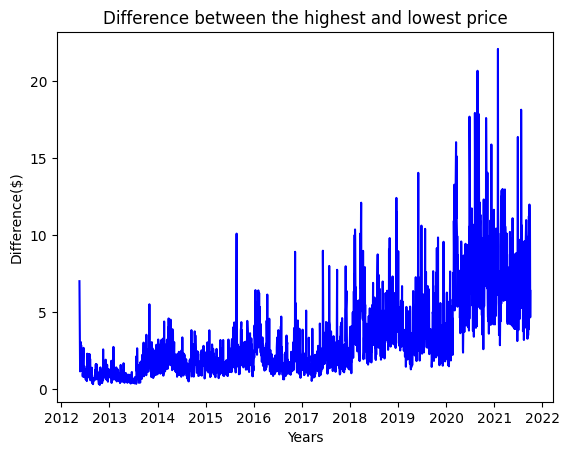

In [ ]:
df['Difference']=df['High']-df['Low']
dates=df['Date'].unique()
plt.plot(dates,df['Difference'],color='blue')
plt.title('Difference between the highest and lowest price')
plt.xlabel('Years')
plt.ylabel('Difference($)')
